In [1]:
from google.colab import drive
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_dir = '/content/drive/.shortcut-targets-by-id/1Y1skwwOFlLTH2H9fnNGBQD832P0M5Els/Ingenium/Datasets'
models_dir = '/content/drive/.shortcut-targets-by-id/1Y1skwwOFlLTH2H9fnNGBQD832P0M5Els/Ingenium/Models'

## Dataset Formats

1. Hydraulic:

* The data set contains raw process sensor data (i.e. without feature extraction) which are structured as matrices (tab-delimited) with the rows representing the cycles and the columns the data points within a cycle.
* 10 .txt files. Given below are filenames and no of data points for each row.

* File: EPS1.txt -> Number of data in each row: 6000
* File: FS1.txt -> Number of data in each row: 600
* File: FS2.txt -> Number of data in each row: 600
* File: CE.txt -> Number of data in each row: 60
* File: CP.txt -> Number of data in each row: 60
* File: PS2.txt -> Number of data in each row: 6000
* File: PS6.txt -> Number of data in each row: 6000
* File: SE.txt -> Number of data in each row: 60
* File: TS2.txt -> Number of data in each row: 60
* File: TS4.txt -> Number of data in each row: 60


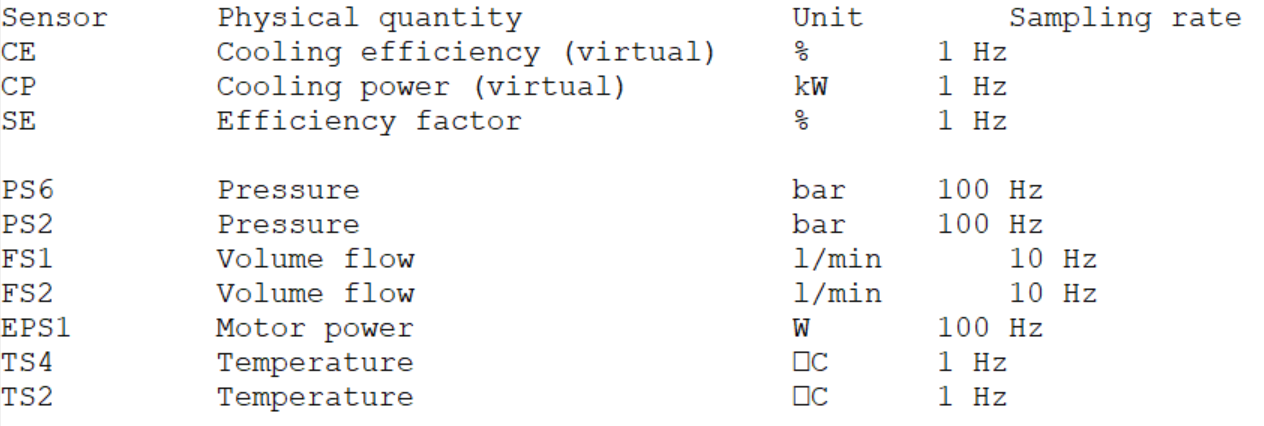

2. Ball Bearing
* 9 columns of features:
max	min	mean	sd	rms	skewness	kurtosis	crest	form
* filename is : feature_time_48k_2048_load_1.csv

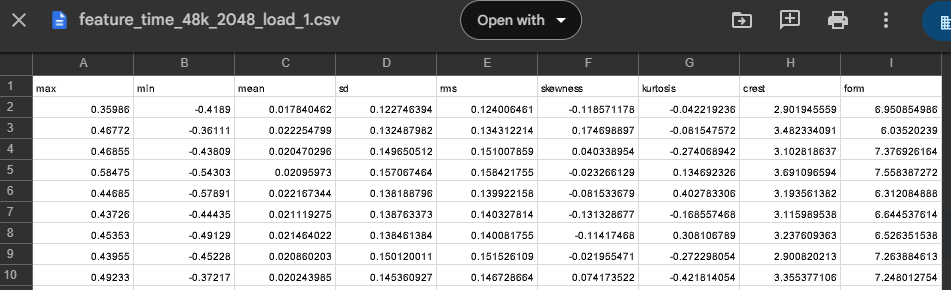

3. Manufacturing and Processing Eqp

* .csv file
* Features:  UDI,  Type,  Air_temperature_K,  Process_temperature_K, Rotational_speed_rpm,  Torque_Nm,  Tool_wear_min

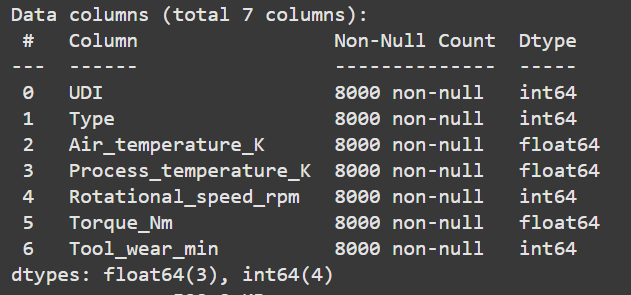

## Model Info

1. Hydraulic



## Hydraulic

In [ ]:
def preprocess_sensor_data(sensor_df):
    """Convert tab-separated string data into numeric arrays."""
    # Split the string on tabs and convert to numeric values
    numeric_data = sensor_df[0].str.split('\t', expand=True).astype(float)
    return numeric_data

def load_and_preprocess_data(file_paths):
    """Load and preprocess the sensor data."""
    data = {}

    # Load all sensor data
    for sensor_type in ['CE', 'CP', 'SE', 'PS6', 'PS2', 'FS1', 'FS2', 'EPS1', 'TS4', 'TS2' ]:
        raw_data = pd.read_csv(f'{file_paths}/{sensor_type}.txt', header=None)
        data[sensor_type] = preprocess_sensor_data(raw_data)

    # Feature engineering
    features = []

    # Process each sensor type
    for sensor_name, sensor_data in data.items():
        # Calculate statistical features for each sensor
        stats = pd.DataFrame({
            f'{sensor_name}_mean': sensor_data.mean(axis=1),
            f'{sensor_name}_std': sensor_data.std(axis=1),
            f'{sensor_name}_max': sensor_data.max(axis=1),
            f'{sensor_name}_min': sensor_data.min(axis=1),
            f'{sensor_name}_range': sensor_data.max(axis=1) - sensor_data.min(axis=1),
            f'{sensor_name}_rms': np.sqrt((sensor_data ** 2).mean(axis=1))
        })
        features.append(stats)
    # Combine all features
    X = pd.concat(features, axis=1)

    return X

In [ ]:
def hydraulic_test():
  data = f"{dataset_dir}/Hydraulic"
  X = load_and_preprocess_data(data)

  model = f"{models_dir}/Hydraulic/hydraulic_model.pkl"
  scaler = f"{models_dir}/Hydraulic/scaler.pkl"

  # Load the scaler
  with open(scaler, 'rb') as file:
      loaded_scaler = pickle.load(file)

  # Load the nn_model
  with open(model, 'rb') as file:
      loaded_hydraulic_model = pickle.load(file)
  print(X.columns)
  new_data_scaled = loaded_scaler.transform(X)
  predictions = loaded_hydraulic_model.predict(new_data_scaled)
  return predictions

In [ ]:
predictions = hydraulic_test()

In [ ]:
data = f"{dataset_dir}/Hydraulic"
X = load_and_preprocess_data(data)

In [ ]:
print(X.columns)

Index(['CE_mean', 'CE_std', 'CE_max', 'CE_min', 'CE_range', 'CE_rms',
       'CP_mean', 'CP_std', 'CP_max', 'CP_min', 'CP_range', 'CP_rms',
       'SE_mean', 'SE_std', 'SE_max', 'SE_min', 'SE_range', 'SE_rms',
       'PS6_mean', 'PS6_std', 'PS6_max', 'PS6_min', 'PS6_range', 'PS6_rms',
       'PS2_mean', 'PS2_std', 'PS2_max', 'PS2_min', 'PS2_range', 'PS2_rms',
       'FS1_mean', 'FS1_std', 'FS1_max', 'FS1_min', 'FS1_range', 'FS1_rms',
       'FS2_mean', 'FS2_std', 'FS2_max', 'FS2_min', 'FS2_range', 'FS2_rms',
       'EPS1_mean', 'EPS1_std', 'EPS1_max', 'EPS1_min', 'EPS1_range',
       'EPS1_rms', 'TS4_mean', 'TS4_std', 'TS4_max', 'TS4_min', 'TS4_range',
       'TS4_rms', 'TS2_mean', 'TS2_std', 'TS2_max', 'TS2_min', 'TS2_range',
       'TS2_rms'],
      dtype='object')


In [ ]:
predictions[-1]

array([100., 100.,   0.,  90.,   0.])

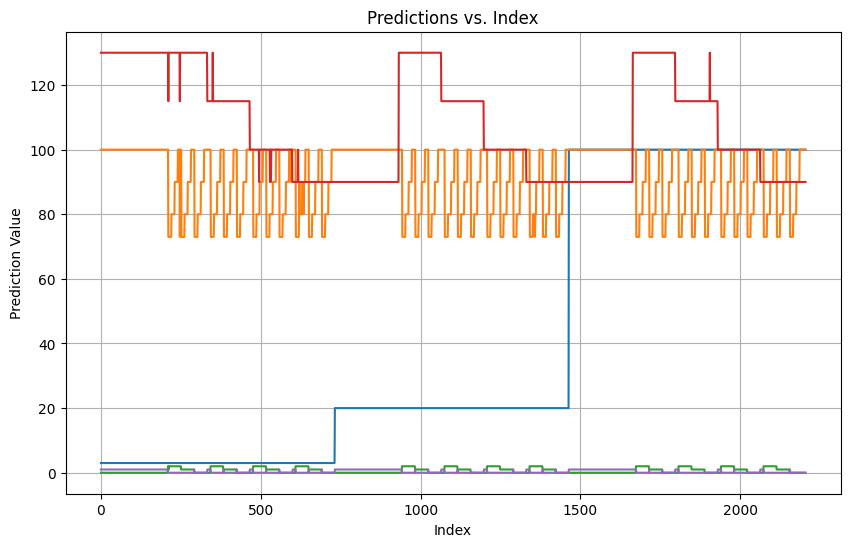

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predictions' is a NumPy array or a list
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(range(len(predictions)), predictions)
plt.xlabel("Index")
plt.ylabel("Prediction Value")
plt.title("Predictions vs. Index")
plt.grid(True)
plt.show()


## Ball Bearing

In [ ]:
def load_and_preprocess_data(file_paths):
  data = pd.read_csv(f"{file_paths}/feature_time_48k_2048_load_1.csv")
  features = ['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest', 'form']
  return data[features]

In [ ]:
def bearing_test():
  data = f"{dataset_dir}/Bearing"
  X = load_and_preprocess_data(data)

  model = f"{models_dir}/Bearing/bearing_model.pkl"
  scaler = f"{models_dir}/Bearing/scaler.pkl"

  # Load the scaler
  with open(scaler, 'rb') as file:
      loaded_scaler = pickle.load(file)

  # Load the nn_model
  with open(model, 'rb') as file:
      loaded_bearing_model = pickle.load(file)

  new_data_scaled = loaded_scaler.transform(X)
  predictions = loaded_bearing_model.predict(new_data_scaled)

  label_encoder = f"{models_dir}/Bearing/label_encoder.pkl"
  with open(label_encoder, 'rb') as file:
      loaded_label_encoder = pickle.load(file)

  labelled_predictions = loaded_label_encoder.inverse_transform(predictions)

  return labelled_predictions

In [ ]:
predictions = bearing_test()

In [ ]:
predictions

array(['Ball_007_1', 'Ball_007_1', 'Ball_007_1', ..., 'Normal_1',
       'Normal_1', 'Normal_1'], dtype=object)

## Maintenance and Processing Eqp

In [4]:
def load_and_preprocess_data(file_paths, loaded_label_encoder):
  data = pd.read_csv(f"{file_paths}/manufacturing_data.csv")
  # data = pd.read_csv(f"predictive_maintenance.csv")
  features = ['UDI', 'Type', 'Air_temperature_K', 'Process_temperature_K', 'Rotational_speed_rpm', 'Torque_Nm', 'Tool_wear_min']
  df = data[features]
  df['Type'] = loaded_label_encoder.transform(df['Type'])
  return df

In [5]:
def manufacturing_test():
  data = f"{dataset_dir}/Manufacturing"
  label_encoder = f"{models_dir}/Manufacturing/label_encoder.pkl"
  with open(label_encoder, 'rb') as file:
      loaded_label_encoder = pickle.load(file)

  X = load_and_preprocess_data(data, loaded_label_encoder)
  # Clean the column names
  X.columns = X.columns.str.replace(r'[<>[\]]', '', regex=True)
  X.columns = X.columns.str.replace(r'\s+', '_', regex=True)

  model = f"{models_dir}/Manufacturing/manufacturing_model.pkl"
  # scaler = f"{models_dir}/Manufacturing/scaler.pkl"

  # # Load the scaler
  # with open(scaler, 'rb') as file:
  #     loaded_scaler = pickle.load(file)

  # Load the nn_model
  with open(model, 'rb') as file:
      loaded_manufacturing_model = pickle.load(file)

  new_data_scaled = X
  predictions = loaded_manufacturing_model.predict(new_data_scaled)


  # labelled_predictions = loaded_label_encoder.inverse_transform(predictions)

  return predictions

In [6]:
predictions = manufacturing_test()

<ipython-input-4-329c4de25e52>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = loaded_label_encoder.transform(df['Type'])


In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

# Naval


In [ ]:
# dataset_dir = '/content/drive/My Drive/Ingenium/Datasets'
# models_dir = '/content/drive/My Drive/Ingenium/Models'

In [ ]:
def load_and_preprocess_data(file_paths):
  data = pd.read_csv(f"{file_paths}/naval_plant_maintenance.csv",header=None)
  features = ['Lever position','Ship speed', 'Gas Turbine shaft torque', 'Gas Turbine rate of revolutions', 'Gas Generator rate of revolutions', 'Starboard Propeller Torque', 'Port Propeller Torque',\
             'HP Turbine exit temperature', 'GT Compressor inlet air temperature', 'GT Compressor outlet air temperature', 'HP Turbine exit pressure', 'GT Compressor inlet air pressure', 'GT Compressor outlet air pressure',\
             'Gas Turbine exhaust gas pressure', 'Turbine Injecton Control', 'Fuel flow']
  data.columns = features
  data = data.drop(['GT Compressor inlet air temperature','GT Compressor inlet air pressure'],axis=1)
  return data

In [ ]:
def naval_test():
  data = f"{dataset_dir}/Naval"
  df = load_and_preprocess_data(data)

  # model = f"/content/drive/My Drive/NIT-Trichy/naval_model.pkl"
  model = f"{models_dir}/Naval/naval_model.pkl"
  scaler = f"{models_dir}/Naval/scaler.pkl"

  # Load the scaler
  with open(scaler, 'rb') as file:
      loaded_scaler = pickle.load(file)

  # Load the nn_model
  with open(model, 'rb') as file:
      loaded_naval_model = pickle.load(file)

  print(df.columns)
  new_data_scaled = loaded_scaler.transform(df)
  predictions = loaded_naval_model.predict(new_data_scaled)
  return predictions

In [ ]:
predictions = naval_test()

Index(['Lever position', 'Ship speed', 'Gas Turbine shaft torque',
       'Gas Turbine rate of revolutions', 'Gas Generator rate of revolutions',
       'Starboard Propeller Torque', 'Port Propeller Torque',
       'HP Turbine exit temperature', 'GT Compressor outlet air temperature',
       'HP Turbine exit pressure', 'GT Compressor outlet air pressure',
       'Gas Turbine exhaust gas pressure', 'Turbine Injecton Control',
       'Fuel flow'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(predictions)

[[0.95926277 0.98294826]
 [0.95502473 0.97673491]
 [0.96083466 0.97446086]
 ...
 [1.00502024 0.99941093]
 [0.99826683 1.00199227]
 [1.00115299 1.00120814]]


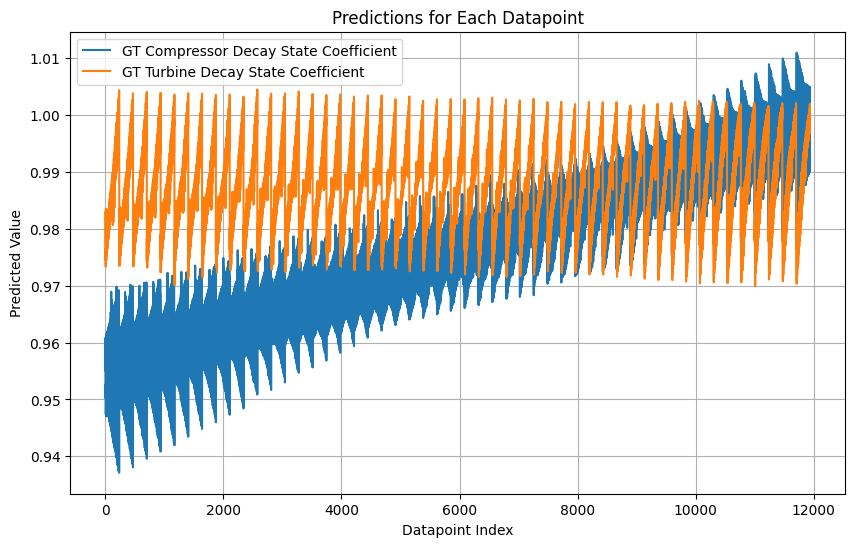

In [ ]:
# prompt: Plot the predictions  for each datapoint from 1 to the length of the datashape

import matplotlib.pyplot as plt

# Assuming 'predictions' is already defined from the previous code
# and has the shape (n_samples, 2) where n_samples is the number of datapoints

plt.figure(figsize=(10, 6))
plt.plot(range(1, predictions.shape[0] + 1), predictions[:, 0], label='GT Compressor Decay State Coefficient')
plt.plot(range(1, predictions.shape[0] + 1), predictions[:, 1], label='GT Turbine Decay State Coefficient')
plt.xlabel('Datapoint Index')
plt.ylabel('Predicted Value')
plt.title('Predictions for Each Datapoint')
plt.legend()
plt.grid(True)
plt.show()